In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Using Theano backend.


In [2]:
df = pd.read_csv('Coinbase_ETHUSD_1h.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2019-06-13 12-AM,ETHUSD,262.92,264.75,261.32,261.85,10563.66,2774999.32
1,2019-06-12 11-PM,ETHUSD,257.40,263.81,256.20,262.92,13085.64,3406348.70
2,2019-06-12 10-PM,ETHUSD,257.68,258.12,255.30,257.40,4556.12,1170756.01
3,2019-06-12 09-PM,ETHUSD,255.94,258.37,255.90,257.68,4450.35,1145360.51
4,2019-06-12 08-PM,ETHUSD,257.57,257.59,253.71,255.94,11386.07,2908797.28


In [3]:
nd = []
for i,(d,o,h,l,c,v) in df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume ETH']].iterrows():
    ds = d.split(' ')[0].split('-')
    hs = d.split(' ')[1].split('-')[:-1]
    ds = [int(x) for x in ds]
    hs = [int(x) for x in hs]
    nd.append(ds + hs + [0,0] + [o,h,l,c,v])
nd

[[2019, 6, 13, 12, 0, 0, 262.92, 264.75, 261.32, 261.85, 10563.66],
 [2019, 6, 12, 11, 0, 0, 257.4, 263.81, 256.2, 262.92, 13085.64],
 [2019, 6, 12, 10, 0, 0, 257.68, 258.12, 255.3, 257.4, 4556.12],
 [2019, 6, 12, 9, 0, 0, 255.94, 258.37, 255.9, 257.68, 4450.35],
 [2019, 6, 12, 8, 0, 0, 257.57, 257.59, 253.71, 255.94, 11386.07],
 [2019, 6, 12, 7, 0, 0, 257.43, 258.72, 256.87, 257.57, 5505.13],
 [2019, 6, 12, 6, 0, 0, 257.65, 259.1, 256.69, 257.43, 5132.72],
 [2019, 6, 12, 5, 0, 0, 258.53, 260.12, 255.56, 257.65, 13035.11],
 [2019, 6, 12, 4, 0, 0, 255.15, 260.5, 254.46, 258.53, 15230.49],
 [2019, 6, 12, 3, 0, 0, 249.49, 257.0, 249.48, 255.15, 22064.48],
 [2019, 6, 12, 2, 0, 0, 249.35, 250.36, 247.42, 249.49, 4611.38],
 [2019, 6, 12, 1, 0, 0, 249.6, 250.22, 248.76, 249.35, 2545.39],
 [2019, 6, 12, 12, 0, 0, 248.83, 251.8, 248.81, 249.6, 6418.05],
 [2019, 6, 12, 11, 0, 0, 248.73, 249.9, 248.16, 248.83, 2193.01],
 [2019, 6, 12, 10, 0, 0, 247.38, 249.97, 247.38, 248.73, 4723.16],
 [2019, 6,

In [4]:
datamatrix = DataMatrix()
for y,mn,d,hr,m,s, o,h,l,c,v in nd[::-1]:
    datamatrix.add_row(DateTime(y,mn,d,hr,m,s), o,h,l,c,int(v))

In [5]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2017-07-01 11:00:00,275.01,279.99,272.1,279.98,2455
2017-07-01 12:00:00,274.83,275.01,271.0,275.01,3023
2017-07-01 01:00:00,268.79,274.93,265.0,274.83,11204
2017-07-01 02:00:00,265.74,269.90,265.0,268.79,6367
2017-07-01 03:00:00,272.57,272.74,265.0,265.74,5581


In [25]:
nd[::-1][0], nd[::-1][-1]

([2017, 7, 1, 11, 0, 0, 279.98, 279.99, 272.1, 275.01, 2455.28],
 [2019, 6, 13, 12, 0, 0, 262.92, 264.75, 261.32, 261.85, 10563.66])

In [7]:
len(datamatrix)

17078

In [8]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [9]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2017-07-01 11:00:00,275.01,279.99,272.1,279.98,2455
2017-07-01 12:00:00,274.83,275.01,271.0,275.01,3023
2017-07-01 01:00:00,268.79,274.93,265.0,274.83,11204
2017-07-01 02:00:00,265.74,269.90,265.0,268.79,6367
2017-07-01 03:00:00,272.57,272.74,265.0,265.74,5581


In [10]:
len(datamatrix)

17078

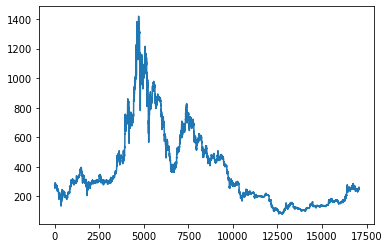

In [11]:
plot(datamatrix.close);

In [12]:
#datamatrix.dump_tsys("data.tsys")

In [13]:
datalen = len(datamatrix)

d_open = np.array(datamatrix.open)
d_high = np.array(datamatrix.high)
d_low = np.array(datamatrix.low)
d_close = np.array(datamatrix.close)
d_volume = np.array(datamatrix.volume)
d_year = np.array([x.year for x in datamatrix.get_dt_list()])
d_month = np.array([x.month for x in datamatrix.get_dt_list()])
d_day = np.array([x.day for x in datamatrix.get_dt_list()])
d_hour = np.array([x.hour for x in datamatrix.get_dt_list()])
d_minute = np.array([x.minute for x in datamatrix.get_dt_list()])
d_second = np.array([x.second for x in datamatrix.get_dt_list()])

In [14]:
import datamodel_super as dm
dmodel = dm.DataModel()
dmodel.input(np.vstack([d_open, d_high, d_low, d_close, d_volume, 
                        d_year, d_month, d_day, d_hour, d_minute, d_second]))

In [15]:
dmodel.process()
nc = dmodel.cut_nans()
nc

178

In [16]:
dmodel.data.shape

(176, 16900)

In [17]:
dmodel.data[0:10, 0:5]

array([[-1.52514081e-01,  1.22558256e-01, -2.00039668e-01,
         6.58301236e-01, -2.89330164e-01],
       [-5.91204905e-02,  8.87264701e-03,  6.03376747e-01,
        -3.99429389e-02,  8.20960259e-02],
       [ 9.09446486e-05, -4.29259248e-01,  1.13911969e-01,
         6.22504646e-01, -1.31019349e-01],
       [ 1.22533423e-01, -2.00085710e-01,  6.58311628e-01,
        -2.89382078e-01,  3.38573022e-01],
       [-3.29398190e-03, -1.87304201e-01, -2.82042136e-01,
         2.14117432e-01,  3.75050462e-01],
       [-3.46990539e-01, -2.84713179e-01, -9.33868565e-02,
         2.32766740e-01,  2.86697649e-01],
       [ 1.22513733e-02, -2.98288892e-01, -1.59317834e-01,
         3.63968248e-01,  3.01059539e-01],
       [-1.87374780e-01, -2.82111224e-01,  2.14040535e-01,
         3.74971032e-01,  2.68088890e-01],
       [-8.57464436e-02, -6.13853898e-03,  2.63742564e-01,
        -1.69814930e-01,  3.35109228e-02],
       [ 2.37000296e-01, -3.72418386e-02,  2.04132325e-01,
        -9.83557226e-02

In [18]:
tgt = np.vstack([d_open[nc:], 
                 d_high[nc:], 
                 d_low[nc:], 
                 d_close[nc:]])
tgt.shape

(4, 16900)

In [19]:
tgt[:, 0:5]

array([[242.61, 243.46, 242.07, 246.64, 244.63],
       [243.46, 243.51, 246.97, 246.74, 247.21],
       [242.5 , 239.52, 240.31, 244.63, 243.72],
       [243.46, 242.07, 246.64, 244.63, 246.98]])

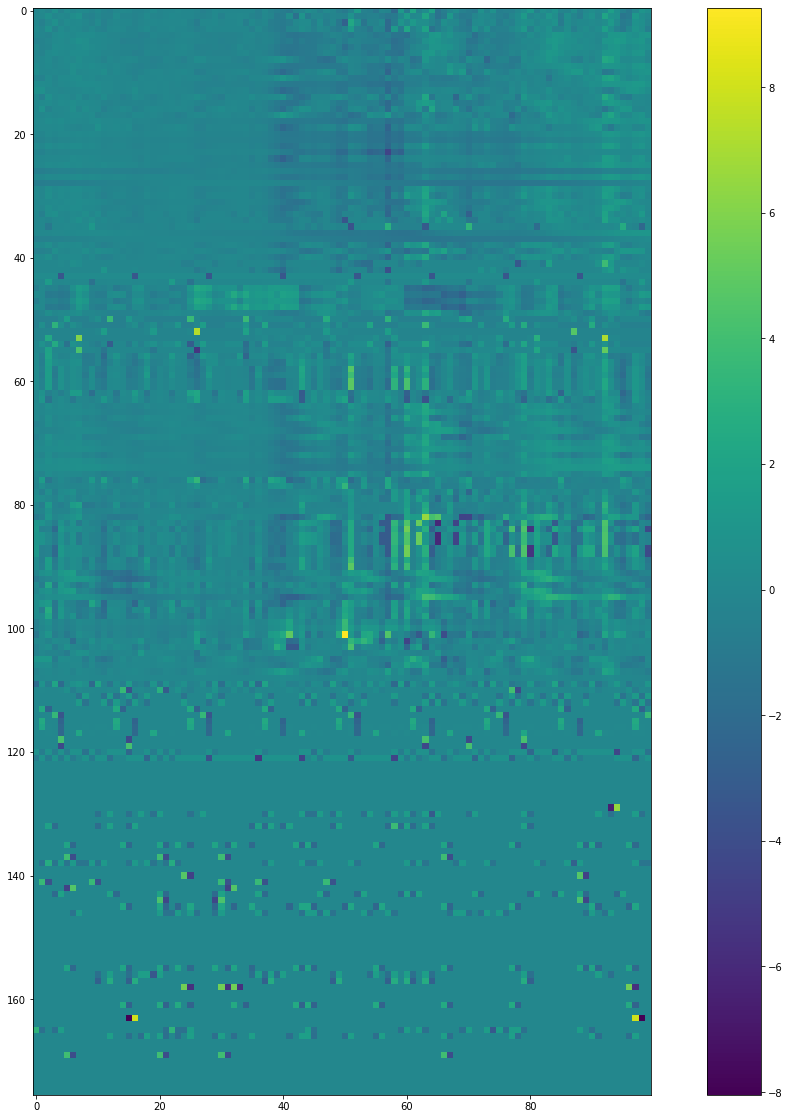

In [20]:
figure(figsize(20,20));
imshow(dmodel.data[:, 0:100]); colorbar();

In [21]:
np.save(open("data_eth.npy",'wb'), dmodel.data)
np.save(open("data_eth_targets.npy",'wb'), tgt)

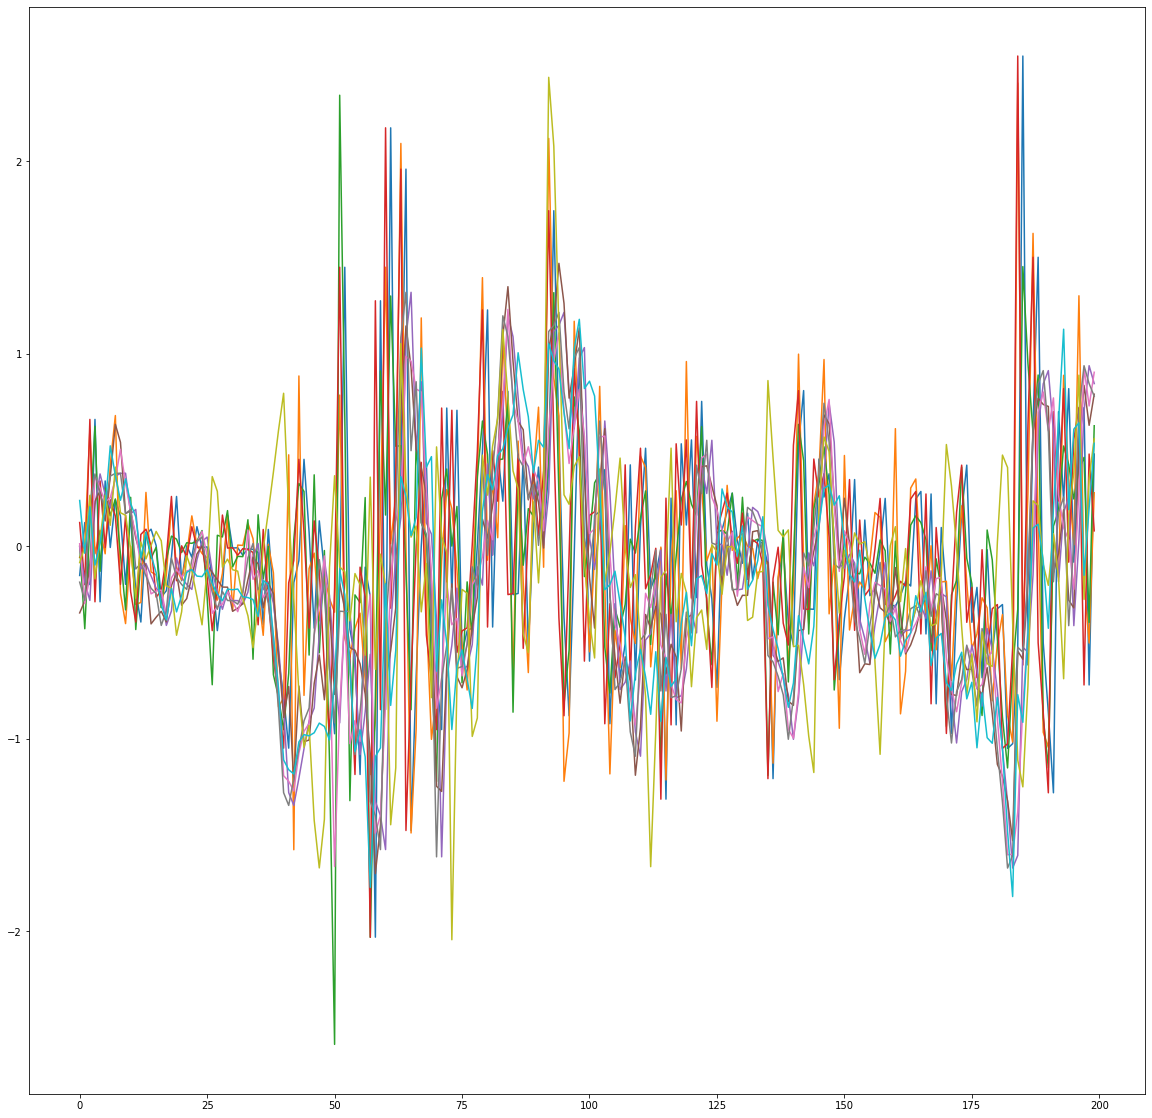

In [22]:
plot(dmodel.data.T[0:200, 0:10]);

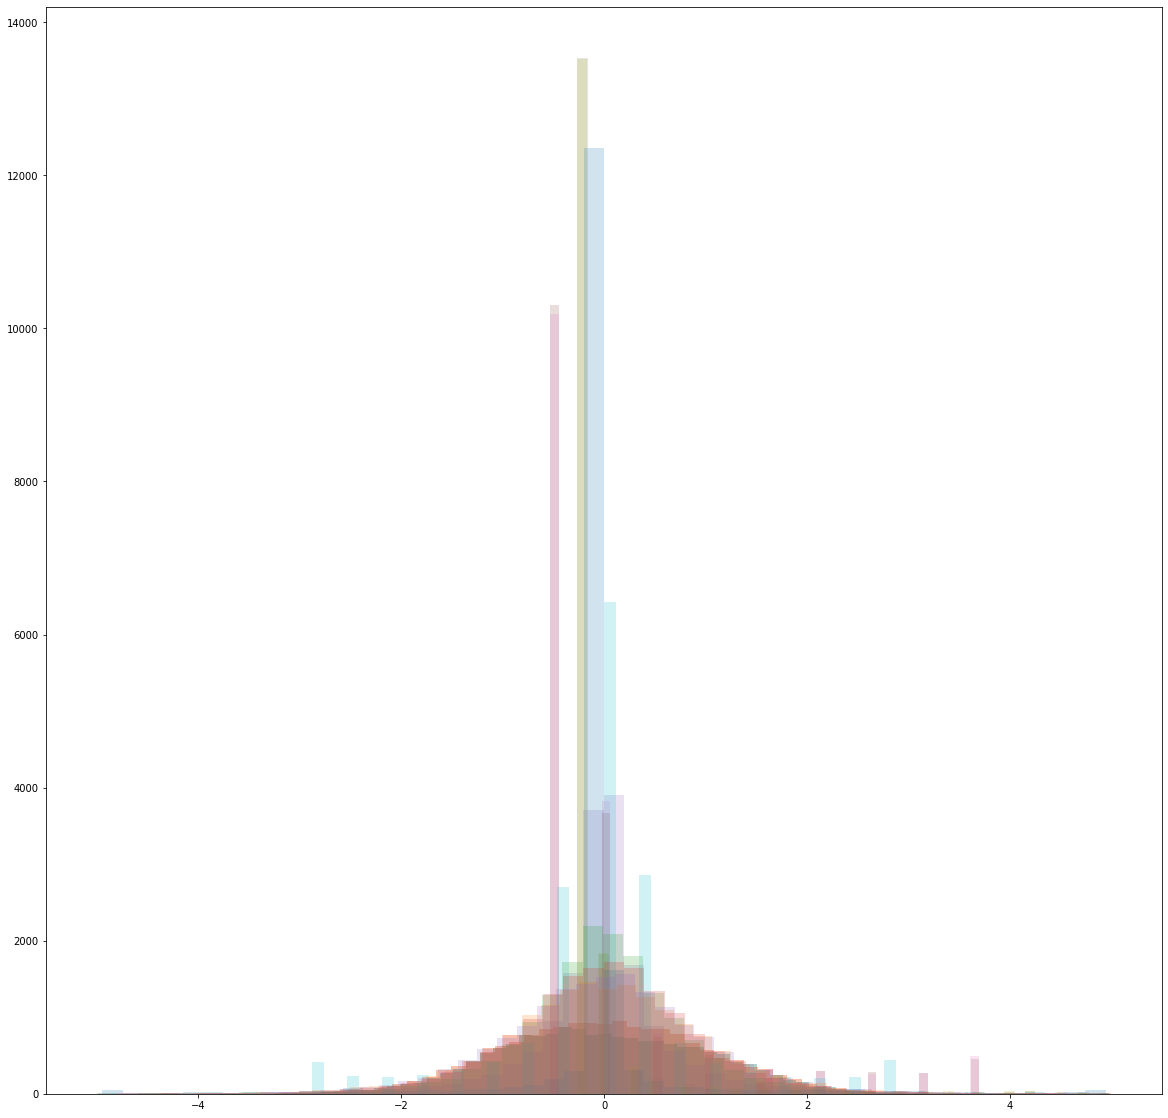

In [23]:
for i in list(range(dmodel.data.shape[0]))[45:60]:
    a = dmodel.data[i]
    a = a[where((a > -5) & (a < 5) )]
    hist(a, 50, alpha=0.2);

In [24]:
mean(a)

-0.0008664144967912747